In [1]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
pd.set_option('expand_frame_repr', False)  



In [2]:
# get current price data
def get_current_data(from_sym='BTC', to_sym='USD', exchange=''):
    url = 'https://min-api.cryptocompare.com/data/price'    
    
    parameters = {'fsym': from_sym,
                  'tsyms': to_sym }
    
    if exchange:
        print('exchange: ', exchange)
        parameters['e'] = exchange
        
    # response comes as json
    response = requests.get(url, params=parameters)   
    data = response.json()
    
    return data 

In [3]:
# get the historic bitcoin data 
def get_hist_data(from_sym='BTC', to_sym='USD', timeframe = 'day', limit=2000, aggregation=1, exchange=''):
    
    url = 'https://min-api.cryptocompare.com/data/v2/histo'
    url += timeframe
    
    parameters = {'fsym': from_sym,
                  'tsym': to_sym,
                  'limit': limit,
                  'aggregate': aggregation}
    if exchange:
        print('exchange: ', exchange)
        parameters['e'] = exchange    
    
    print('baseurl: ', url) 
    print('timeframe: ', timeframe)
    print('parameters: ', parameters)
    
    # response comes as json
    response = requests.get(url, params=parameters)   
    
    data = response.json()['Data']['Data'] 
    
    return data 

In [4]:
# function to convert data into a table which is easier to manipulate
def data_to_dataframe(data):
    #data from json is in array of dictionaries
    df = pd.DataFrame.from_dict(data)
    
    # time is stored as an epoch, we need normal dates
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    print(df.tail())
    
    return df

In [5]:
# visualise the data
def plot_data(df, cryptocurrency, target_currency):
    
    from pandas.plotting import register_matplotlib_converters
    register_matplotlib_converters()
    
    plt.figure(figsize=(15,5))
    plt.title('{} / {} price data'.format(cryptocurrency, target_currency))
    plt.plot(df.index, df.close)
    plt.legend()
    plt.show()
    
    return None

baseurl:  https://min-api.cryptocompare.com/data/v2/histoday
timeframe:  day
parameters:  {'fsym': 'BTC', 'tsym': 'USD', 'limit': 1000, 'aggregate': 1}
                high       low      open  volumefrom      volumeto     close conversionType conversionSymbol
time                                                                                                        
2022-10-04  20459.26  19499.64  19632.35    64461.86  1.290593e+09  20344.58         direct                 
2022-10-05  20366.34  19757.31  20344.58    59503.18  1.195512e+09  20160.74         direct                 
2022-10-06  20449.46  19866.54  20160.74    74646.94  1.502842e+09  19965.12         direct                 
2022-10-07  20058.36  19331.73  19965.12    59698.47  1.177832e+09  19532.81         direct                 
2022-10-08  19625.41  19428.21  19532.81     7268.37  1.418920e+08  19495.32         direct                 


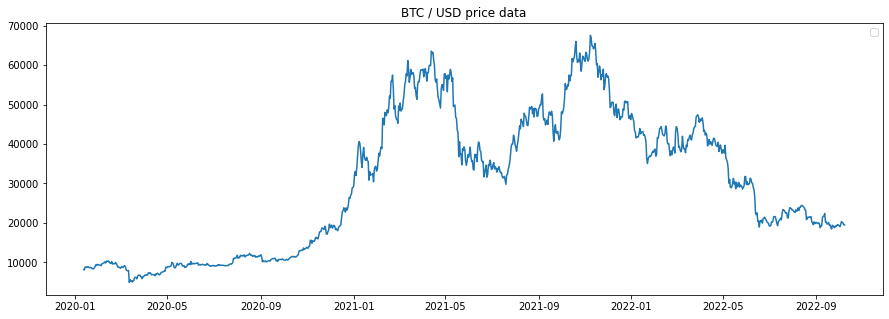

baseurl:  https://min-api.cryptocompare.com/data/v2/histominute
timeframe:  minute
parameters:  {'fsym': 'BTC', 'tsym': 'USD', 'limit': 1440, 'aggregate': 1}
                         high       low      open  volumefrom   volumeto     close conversionType conversionSymbol
time                                                                                                              
2022-10-08 10:39:00  19504.00  19497.79  19502.52      11.570  225669.73  19499.16         direct                 
2022-10-08 10:40:00  19501.62  19496.92  19499.16      17.170  334796.37  19498.24         direct                 
2022-10-08 10:41:00  19500.18  19494.80  19498.24       4.588   89454.74  19496.26         direct                 
2022-10-08 10:42:00  19498.29  19493.07  19496.26       9.297  181260.82  19494.53         direct                 
2022-10-08 10:43:00  19495.32  19494.53  19494.53       0.000       0.00  19495.32         direct                 


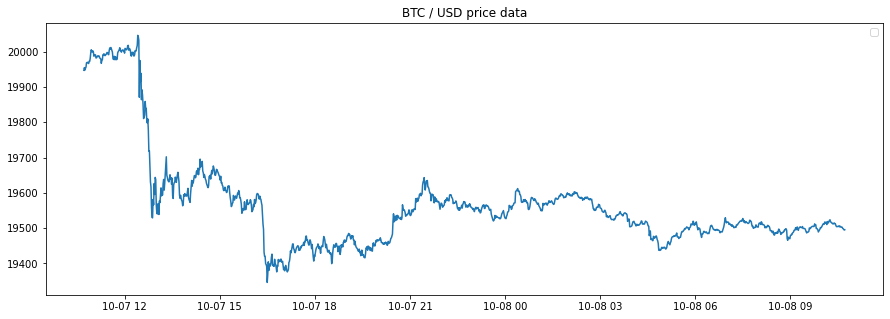

In [6]:
cryptocurrency = 'BTC'
target_currency = 'USD'

# print a graph with daily values
data = get_hist_data(cryptocurrency, target_currency, 'day', 1000)
df = data_to_dataframe(data)

plot_data(df, cryptocurrency, target_currency)

# print a graph with minutely values from the past 24 hours
minute_data = get_hist_data(cryptocurrency, target_currency, 'minute', 1440)
minute_df = data_to_dataframe(minute_data)
plot_data(minute_df, cryptocurrency, target_currency)

In [7]:
# get current price data
current_price = float(df.iloc[-1:]['close'])
current_price



19495.32

In [8]:
minute_price = minute_df.iloc[-1:]
float_minute_price = float(minute_price['close'])
float_minute_price

19495.32

In [9]:
recent_df = df['close'].iloc[-10::]
inverse_df = recent_df.iloc[::-1]
inverse_df



time
2022-10-08    19495.32
2022-10-07    19532.81
2022-10-06    19965.12
2022-10-05    20160.74
2022-10-04    20344.58
2022-10-03    19632.35
2022-10-02    19058.15
2022-10-01    19313.96
2022-09-30    19425.63
2022-09-29    19593.46
Name: close, dtype: float64

In [10]:
trend_df = df.iloc[-70::]['close']
weekly_average = trend_df.groupby(np.arange(len(trend_df))//7).mean()
current_week = weekly_average[9]
inv_week = weekly_average.iloc[::-1]
inv_week

9    19741.295714
8    19266.860000
7    19132.640000
6    20609.562857
5    20031.835714
4    19947.485714
3    21093.714286
2    22969.867143
1    23845.614286
0    23042.151429
Name: close, dtype: float64

In [11]:
x = weekly_average[9]
counter = 0
negative_counter = 0
for i in inv_week:
    if x >= i:
        counter += 1
        pass
    else:
        break
for i in inv_week:
    if x <= i:
        negative_counter += 1
        pass
    else:
        break



In [12]:
previous_values = recent_df.iloc[:-1]
low_value = previous_values.min()
high_value = previous_values.max()
average = inverse_df.mean()

if current_price - 100 > average:
    print('Short term: sell bitcoin at the current price of: ${}'.format(str(float_minute_price)))
    print("Reasoning: Bitcoin's current price is ${} higher than the average of the past 10 days".format(round(abs(current_price-average))))
elif current_price + 100 < average:
    print('Short term: Buy bitcoin at the current price of: ${}'.format(str(float_minute_price)))
    print("Reasoning: Bitcoin's current price is ${} lower than the average of the past 10 days".format(round(abs(current_price-average))))

if counter != 1:
    print("Trend: Bitcoin has been increasing in value for the past {} weeks".format(counter))
    print("Long term: Buy")

if negative_counter != 1:
    print("Trend: Bitcoin has been decreasing in value for the past {} weeks".format(negative_counter))
    print("Long term: Sell")
    
# elif current_price < inverse_df[1] < inverse_df[2]:
#    print('buy bitcoin at the current price of: ${}'.format(str(float_minute_price)))
# elif current_price > inverse_df[1] > inverse_df[2]:
#    print('sell bitcoin at the current price of: ${}'.format(str(float_minute_price)))


Short term: Buy bitcoin at the current price of: $19495.32
Reasoning: Bitcoin's current price is $157 lower than the average of the past 10 days
Trend: Bitcoin has been increasing in value for the past 3 weeks
Long term: Buy
